In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def get_multivariate_sample(n, d, mean, p = .5, spherical = True, truncated = False):
    cov_1 = np.identity(d)
    cov_2 = np.identity(d)
    if not spherical:
        diag = np.ones(d)
        diag[0] = 3
        cov_2 = np.diag(diag)
    x_sample = []
    y_sample = []
    means = np.zeros(d)
    means[0] = mean
        
    while len(y_sample) < n:
        y = np.random.binomial(1, p)
        if (y == 0):
            x = np.random.multivariate_normal(-means, cov_1)                
        else:
            x = np.random.multivariate_normal(means, cov_2)
        if truncated and y == 0 and x[0] > 0:
            continue
        elif truncated and y == 1 and x[0] < 0:
            continue
        else:
            x_sample.append(x.tolist())
            y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class(sample):
    y_one = [pair for pair in sample if pair[1] == 1]
    y_neg_one = [pair for pair in sample if pair[1] == 0]
    return y_one, y_neg_one

X, y = get_multivariate_sample(10000, 2, 2)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 2, p = .5")
plt.show()

X, y = get_multivariate_sample(2000, 2, 1, .99)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
print(len(class_one))
print(len(class_neg_one))
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 0, p = .999")
plt.show()

X, y = get_multivariate_sample(10000, 2, 2, .5, False)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 1, p = .5, ")
plt.show()

X, y = get_multivariate_sample(5000, 2, 0, .5, True, True)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 1, p = .5, ")
plt.show()


<Figure size 640x480 with 1 Axes>

1979
21


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
def three_class_multivariate(n, d, mean):
    mean_1 = np.zeros(d)
    mean_1[0] = mean
    mean_2 = np.zeros(d)
    mean_2[0] = -mean
    mean_3 = np.zeros(d)
    mean_3[1] = mean
    x_sample = []
    y_sample = []
    for i in range(n):
        y = np.random.multinomial(1, [1/3.]*3).flatten()
        y = np.argwhere(y == 1).item()
        if y == 0:
            x = np.random.multivariate_normal(mean_1, np.identity(d))
        elif y == 1:
            x = np.random.multivariate_normal(mean_2, np.identity(d))
        else:
            x = np.random.multivariate_normal(mean_3, np.identity(d))
        x_sample.append(x.tolist())
        y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class_3(sample):
    y_one = [pair for pair in sample if pair[1] == 0]
    y_two = [pair for pair in sample if pair[1] == 1]
    y_three = [pair for pair in sample if pair[1] == 2]
    return y_one, y_two, y_three
    

In [125]:
X, y = three_class_multivariate(10000, 2, 2)
print(y)
sample = list(zip(X, y))
class_one, class_two, class_three = split_by_class_3(sample)

0
0
1
0
0
2
0
0
0
1
2
1
1
1
1
2
2
0
1
0
1
0
0
2
0
2
2
2
1
0
0
1
0
2
0
0
2
2
0
0
2
0
1
2
2
2
2
2
2
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
2
0
1
1
0
2
2
2
0
2
0
1
0
1
2
1
1
1
1
1
1
0
0
1
2
0
0
0
1
0
0
0
0
0
2
0
2
0
2
2
1
0
2
1
2
0
2
0
1
0
1
0
1
1
2
0
1
2
2
2
1
2
1
0
2
1
0
0
2
2
0
2
0
2
1
0
2
2
1
1
0
0
0
2
2
2
0
2
1
2
2
1
2
0
1
0
0
1
1
1
0
0
1
1
1
2
2
1
0
2
0
1
1
0
2
0
1
2
2
2
1
0
0
1
1
2
0
1
2
2
0
1
2
1
1
2
1
2
2
0
2
2
1
0
0
0
2
2
1
1
0
0
1
2
1
0
0
2
1
2
1
1
0
2
2
2
1
1
2
1
2
2
0
2
0
0
1
0
0
1
0
0
1
1
2
0
0
2
1
0
0
2
0
1
0
2
2
2
2
1
0
1
1
2
0
2
1
1
1
1
1
2
2
1
1
1
2
2
2
2
0
0
2
0
1
1
1
0
2
1
2
1
2
1
0
2
1
0
2
1
0
0
1
0
1
1
0
2
1
1
2
0
2
2
1
1
2
1
1
0
1
2
0
1
1
0
1
2
1
0
2
1
1
2
1
1
2
0
0
2
0
0
0
0
0
2
2
1
0
2
0
1
2
2
1
1
2
0
0
2
0
2
2
0
0
1
0
0
0
0
1
1
2
2
1
2
2
0
0
0
2
1
1
1
0
0
1
1
0
2
1
1
1
0
1
2
1
1
1
0
0
2
1
1
0
1
2
0
2
1
2
2
0
2
0
2
2
2
0
1
2
2
1
1
0
0
1
0
2
2
1
1
2
2
1
0
2
2
1
1
2
1
0
1
1
2
2
2
2
1
0
0
2
1
2
2
1
0
0
2
1
0
1
0
2
2
1
0
1
2
0
0
1
0
0
2
1
2
2
2
0
1
0
1
2
2
1
2
2
1
0
1
0
0
1
0


2
0
1
1
0
0
0
2
1
0
0
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
1
1
1
2
2
2
0
0
1
0
0
2
2
1
1
1
2
1
1
2
1
1
2
2
1
2
2
2
2
1
0
1
2
2
1
1
2
0
0
0
1
0
1
1
0
1
2
1
2
1
2
2
0
2
2
1
1
1
2
0
2
1
2
1
2
2
2
1
2
1
0
1
0
1
0
0
2
1
2
1
2
1
0
0
2
0
2
2
1
0
2
2
0
0
0
1
1
0
2
0
2
1
1
1
0
0
2
2
0
0
1
2
2
1
0
1
2
0
2
0
0
2
1
0
1
2
2
2
0
0
1
0
0
1
0
1
2
2
1
0
1
0
2
2
1
2
1
0
0
0
2
2
0
1
1
0
1
2
1
1
1
1
0
0
0
1
0
2
1
1
0
0
0
1
1
2
2
0
1
0
2
1
0
2
0
0
1
0
0
2
0
0
2
2
1
0
2
0
2
2
1
2
2
2
0
0
2
2
2
1
1
1
2
0
1
2
1
1
0
2
0
0
2
1
2
1
0
0
1
1
2
0
0
2
2
1
0
2
1
0
1
1
2
1
1
0
0
0
0
2
2
0
2
2
1
1
1
1
0
2
2
2
1
0
2
1
2
1
2
1
0
1
0
0
1
0
2
0
0
2
0
0
1
0
1
2
1
0
1
2
1
2
2
0
2
0
2
1
2
2
2
2
0
0
2
2
2
1
2
0
0
1
0
2
1
2
2
2
0
0
0
0
2
0
1
0
0
0
2
1
1
2
2
2
0
1
0
0
0
2
0
0
1
0
0
1
2
0
0
1
2
1
2
0
0
0
1
2
0
1
1
1
1
2
1
1
2
1
1
0
2
1
0
0
0
2
1
2
2
1
2
2
0
0
1
1
2
2
2
0
1
1
2
0
2
2
1
0
0
2
2
1
2
2
0
0
2
1
2
1
0
2
0
1
1
1
1
1
0
2
0
2
1
0
2
2
2
1
1
2
0
0
0
0
0
1
1
0
0
0
0
0
1
2
2
1
1
2
2
0
0
0
0
0
0
0
1
0
0
2
2
2
2
0
0
1
1
2
2
1
2
2
1


1
0
1
0
1
1
2
0
0
2
1
2
2
2
2
0
0
0
0
1
1
2
0
2
2
2
1
1
0
1
0
1
0
2
0
0
0
1
0
0
2
0
2
2
2
0
1
2
1
1
0
1
0
2
0
2
0
1
1
0
0
2
0
1
2
1
0
1
0
2
1
1
2
0
2
2
1
2
2
2
0
1
1
1
1
0
2
2
1
2
2
0
2
2
1
2
1
1
1
1
2
0
2
2
1
0
2
0
0
0
0
0
2
1
0
2
2
1
1
2
1
1
1
2
1
1
2
0
2
1
1
1
1
1
2
1
1
1
0
1
2
1
1
2
1
2
0
0
1
2
2
2
0
2
2
2
0
2
0
1
0
1
2
1
1
0
1
0
0
0
0
0
1
1
0
2
2
2
2
0
2
2
0
1
1
0
0
0
1
1
1
2
0
0
1
1
2
1
1
2
0
2
2
1
0
0
1
2
2
0
2
0
0
2
0
0
2
2
1
0
2
0
2
1
1
0
1
0
2
1
2
0
2
0
1
1
2
2
2
1
2
1
0
1
0
0
2
0
0
1
2
2
2
0
1
1
1
2
0
0
1
1
0
1
0
1
2
2
1
0
2
0
0
2
2
0
1
1
2
0
0
2
0
2
0
2
1
2
0
0
0
1
2
2
2
2
0
2
0
2
2
2
1
1
2
1
1
2
0
1
2
2
0
0
0
0
2
2
0
2
1
2
2
2
2
0
2
1
1
0
2
2
0
0
2
0
1
1
2
1
0
0
1
2
2
2
0
1
1
0
2
0
1
0
1
2
1
2
1
0
1
1
2
2
0
1
1
0
0
1
0
1
2
2
0
2
0
1
2
2
1
0
0
1
2
2
1
0
2
2
1
0
1
1
2
0
1
1
0
2
1
1
1
2
1
1
0
2
2
1
0
2
2
2
0
2
1
2
0
1
1
0
1
1
2
1
0
1
0
2
0
0
2
2
0
2
0
1
1
1
2
0
1
1
1
1
2
0
1
0
0
2
0
1
1
1
1
1
0
2
1
0
2
2
0
1
0
2
1
2
1
2
2
2
0
1
0
0
2
1
2
0
2
2
0
0
1
2
0
0
0
2
0
1
0
1
0
1
0
1


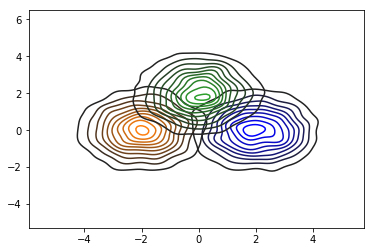

In [99]:
import seaborn as sns
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_two))[0]], [x[1] for x in list(zip(*class_two))[0]])
sns.kdeplot([x[0] for x in list(zip(*class_three))[0]], [x[1] for x in list(zip(*class_three))[0]])

In [2]:
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import math


def rf_entropy_estimate_bagging(X, y, n_estimators = 200, max_samples = .32, bootstrap = True, depth = 30, min_samples_leaf = 1, max_features = 1.):
    model = BaggingClassifier(DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_samples_leaf, max_features = math.ceil(int(math.sqrt(X.shape[1])))), 
                              n_estimators = n_estimators, 
                              max_samples= max_samples, 
                              bootstrap = bootstrap)
    model.fit(X, y)
    class_counts = np.zeros((X.shape[0], model.n_classes_))
    for tree in model:
        # get out of bag indicies
        unsampled_indices = _generate_unsampled_indices(tree.random_state, len(X))
        
        total_unsampled = len(unsampled_indices)
        np.random.shuffle(unsampled_indices)
        prob_indices, eval_indices = unsampled_indices[:total_unsampled//2], unsampled_indices[total_unsampled//2:]
        # get all node counts
        node_counts = tree.tree_.n_node_samples
        # get probs for eval samples
        posterior_class_counts = np.zeros((len(node_counts), model.n_classes_))
        for prob_index in prob_indices:
            posterior_class_counts[tree.apply(X[prob_index].reshape(1, -1)).item(), y[prob_index]] += 1
        row_sums = posterior_class_counts.sum(axis=1)
        row_sums[row_sums == 0] = 1
        class_probs = (posterior_class_counts/row_sums[:, None])
        
        where_0 = np.argwhere(class_probs == 0)
        for elem in where_0:
            class_probs[elem[0], elem[1]] = 1/(model.n_classes_*row_sums[elem[0], None])
        where_1 = np.argwhere(class_probs == 1)
        for elem in where_1:
            class_probs[elem[0], elem[1]] = 1 - (model.n_classes_ - 1)/(model.n_classes_*row_sums[elem[0], None])
        
        class_probs.tolist()
        partition_counts = np.asarray([node_counts[x] for x in tree.apply(X[eval_indices])])
        # get probability for out of bag samples
        eval_class_probs = [class_probs[x] for x in tree.apply(X[eval_indices])]
        eval_class_probs = np.array(eval_class_probs)
        # find total elements for out of bag samples
        elems = np.multiply(eval_class_probs, partition_counts[:, np.newaxis])
        # store counts for each x (repeat fhis for each tree)
        class_counts[eval_indices] += elems
    # calculate p(y|X = x) for all x's
    probs = class_counts/class_counts.sum(axis = 1, keepdims = True)
    entropies = -np.sum(np.log(probs)*probs, axis = 1)
    # convert nan to 0
    entropies = np.nan_to_num(entropies)
    return np.mean(entropies)

np.warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from scipy.stats import entropy

def get_entropy(X):
    probs = np.bincount(X)/len(X)
    return entropy(probs)

def get_mutual_information(X, y, n_estimators = 300, max_samples = .32, depth = 30):
    cond_entropy = rf_entropy_estimate_bagging(X, y, n_estimators = n_estimators, max_samples = max_samples, depth = depth)
    h_y = get_entropy(y)
    return h_y - cond_entropy


In [4]:
from tqdm import tqdm_notebook
import sys
sys.path.insert(0, "./code")
import entropy_estimators as ee
import mixed

def mutual_information_v_mu(n, d, spherical = True, truncated = False):
    means = [i*.2 for i in range(0, 26)]
    #means.reverse()
    #means.extend([i*.2 for i in range(1, 26)])
    cef = []
    kraskov = []
    mixed_ksg = []
    for mean in tqdm_notebook(means):
        X, y = get_multivariate_sample(n, d, mean, .5, spherical, truncated)
        kraskov.append(ee.micd(X, y.reshape(-1, 1)))
        cef.append(get_mutual_information(X, y))
        mixed_ksg.append(mixed.Mixed_KSG(X, y.reshape(-1, 1)))
    return means, cef, kraskov, mixed_ksg

In [65]:
means, cef_ellipse, kraskov_ellipse, mixed_ellipse = mutual_information_v_mu(10000, 6, False, False)

In [66]:
import pickle
pickle.dump({"means": means, "cef_ellipse": cef_ellipse, "kraskov_ellipse": kraskov_ellipse, "mixed_ellipse": mixed_ellipse}, open("mi_ellipse.p", "wb"))

In [67]:
means, cef_ellipse_40, kraskov_ellipse_40, mixed_ellipse_40 = mutual_information_v_mu(10000, 40, False, False)

In [132]:
pickle.dump({"means": means, "cef_ellipse": cef_ellipse_40, "kraskov_ellipse": kraskov_ellipse_40, "mixed_ellipse": mixed_ellipse_40}, open("mi_ellipse_40.p", "wb"))


In [139]:
means, cef_trunc, kraskov_trunc, mixed_trunc = mutual_information_v_mu(10000, 6, True, True)
pickle.dump({"means": means, "cef": cef_trunc, "kraskov": kraskov_trunc, "mixed": mixed_trunc}, open("mi_trunc.p", "wb"))


In [140]:
means, cef_trunc_40, kraskov_trunc_40, mixed_trunc_40 = mutual_information_v_mu(10000, 40, True, True)
pickle.dump({"means": means, "cef": cef_trunc_40, "kraskov": kraskov_trunc_40, "mixed": mixed_trunc_40}, open("mi_trunc_40.p", "wb"))


In [5]:
import pickle
def mutual_information_v_p(n, d):
    probs = [i*.02 for i in range(0, 26)]
    cef = []
    kraskov = []
    mixed_ksg = []
    for p in tqdm_notebook(probs):
        X, y = get_multivariate_sample(n, d, 1, p, spherical=True, truncated=False)
        cef.append(get_mutual_information(X, y))
        kraskov.append(ee.micd(X, y.reshape(-1, 1)))
        mixed_ksg.append(mixed.Mixed_KSG(X, y.reshape(-1, 1)))
    return probs, cef, kraskov, mixed_ksg

probs, cef_p, kraskov_p, mixed_p = mutual_information_v_p(10000, 6)
pickle.dump({"probs": probs, "cef": cef_p, "kraskov": kraskov_p, "mixed": mixed_p}, open("mi_prob.p", "wb"))


probs, cef_p_40, kraskov_p_40, mixed_p_40 = mutual_information_v_p(10000, 40)
pickle.dump({"probs": probs, "cef": cef_p_40, "kraskov": kraskov_p_40, "mixed": mixed_p_40}, open("mi_prob_40.p", "wb"))



In [6]:

def mutual_information_v_mu_three_class(n, d):

    means=[i*.2 for i in range(1, 26)]
    cef = []
    kraskov = []
    mixed_ksg = []
    for mean in tqdm_notebook(means):
        X, y = three_class_multivariate(n, d, mean)
        cef.append(get_mutual_information(X, y))
        kraskov.append(ee.mi(X, y.reshape(-1, 1)))
        mixed_ksg.append(mixed.Mixed_KSG(X, y.reshape(-1, 1)))
    return means, cef, kraskov, mixed_ksg

In [9]:
means, cef_three, kraskov_three, mixed_three = mutual_information_v_mu_three_class(10000, 6)
pickle.dump({"means": means, "cef": cef_three, "kraskov": kraskov_three, "mixed": mixed_three}, open("mi_three_class_mi.p", "wb"))


In [10]:
means, cef_three_40, kraskov_three_40, mixed_three_40 = mutual_information_v_mu_three_class(10000, 40)
pickle.dump({"means": means, "cef": cef_three_40, "kraskov": kraskov_three_40, "mixed": mixed_three_40}, open("mi_three_class_40_mi.p", "wb"))
